# 1.1. Load and Pre-process Dataset

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from sklearn.preprocessing import StandardScaler

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocessing
# Normalize values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Put images into vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Reshape labels as vectors
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

# Standardize values (0 mean and unit variance)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


4422102/4422102 [==============================] - 0s 0us/step


# 1.2.

## PCA

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint
import warnings
warnings.filterwarnings('ignore')

# Load Fashion MNIST dataset
fashion_mnist = fetch_openml(name='Fashion-MNIST', version=1)
X = fashion_mnist.data
y = fashion_mnist.target

# Preprocessing: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Perform dimensionality reduction using PCA with random search for number of components
pca = PCA()
param_grid_pca = {'n_components': randint(1, X_train.shape[1])}
random_search_pca = RandomizedSearchCV(pca, param_distributions=param_grid_pca, n_iter=10, cv=3)
random_search_pca.fit(X_train)

# # Perform dimensionality reduction using PCA with random search for number of components
# pca = PCA()
# param_grid_pca = {'n_components': np.arange(int(X_train.shape[1] * 0.95), X_train.shape[1] + 1)}
# random_search_pca = RandomizedSearchCV(pca, param_distributions=param_grid_pca, n_iter=10, cv=3)
# random_search_pca.fit(X_train)

# Get the best number of components and best parameters for PCA
best_n_components = random_search_pca.best_params_['n_components']
best_params_pca = random_search_pca.best_params_

# Apply PCA with the best number of components
pca = PCA(n_components=best_n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define the KNN classifiers
knn_without_pca = KNeighborsClassifier()
knn_with_pca = KNeighborsClassifier()

# Define the parameter grid for random search
param_grid_knn = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance']
}

# Perform random search for parameter tuning without PCA
random_search_without_pca = RandomizedSearchCV(knn_without_pca, param_distributions=param_grid_knn, n_iter=10, cv=3)
start_time_without_pca = time.time()
random_search_without_pca.fit(X_train, y_train)
end_time_without_pca = time.time()

# Perform random search for parameter tuning with PCA
random_search_with_pca = RandomizedSearchCV(knn_with_pca, param_distributions=param_grid_knn, n_iter=10, cv=3)
start_time_with_pca = time.time()
random_search_with_pca.fit(X_train_pca, y_train)
end_time_with_pca = time.time()

# Predict labels for the test set without PCA
start_time_pred_without_pca = time.time()
y_pred_without_pca = random_search_without_pca.predict(X_test)
end_time_pred_without_pca = time.time()

# Predict labels for the test set with PCA
start_time_pred_with_pca = time.time()
y_pred_with_pca = random_search_with_pca.predict(X_test_pca)
end_time_pred_with_pca = time.time()

# Compute the accuracy without PCA
accuracy_without_pca = accuracy_score(y_test, y_pred_without_pca)

# Compute the accuracy with PCA
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)

# Compute the confusion matrix without PCA
cm_without_pca = confusion_matrix(y_test, y_pred_without_pca)

# Compute the confusion matrix with PCA
cm_with_pca = confusion_matrix(y_test, y_pred_with_pca)

# Calculate the percentage values for the confusion matrices
cm_without_pca_percent = cm_without_pca / cm_without_pca.sum(axis=1)[:, np.newaxis]
cm_with_pca_percent = cm_with_pca / cm_with_pca.sum(axis=1)[:, np.newaxis]

# Print all results
print("Results without PCA:")
print("Best Parameters: ", random_search_without_pca.best_params_)
print("Accuracy: ", accuracy_without_pca)
print("Classification Time: ", end_time_without_pca - start_time_without_pca)
print("Prediction Time: ", end_time_pred_without_pca - start_time_pred_without_pca)
print()
print("Results with PCA:")
print("Best Parameters: ", random_search_with_pca.best_params_)
print("Accuracy: ", accuracy_with_pca)
print("Classification Time: ", end_time_with_pca - start_time_with_pca)
print("Prediction Time: ", end_time_pred_with_pca - start_time_pred_with_pca)

# Print the best components and parameters of PCA
print("Best Components (PCA):", best_n_components)
print("Best Parameters (PCA):", best_params_pca)


Results without PCA:
Best Parameters:  {'n_neighbors': 7, 'weights': 'distance'}
Accuracy:  0.8567857142857143
Classification Time:  1279.7628347873688
Prediction Time:  47.87683057785034

Results with PCA:
Best Parameters:  {'n_neighbors': 6, 'weights': 'distance'}
Accuracy:  0.8605714285714285
Classification Time:  1206.4444375038147
Prediction Time:  44.352290630340576
Best Components (PCA): 735
Best Parameters (PCA): {'n_components': 735}


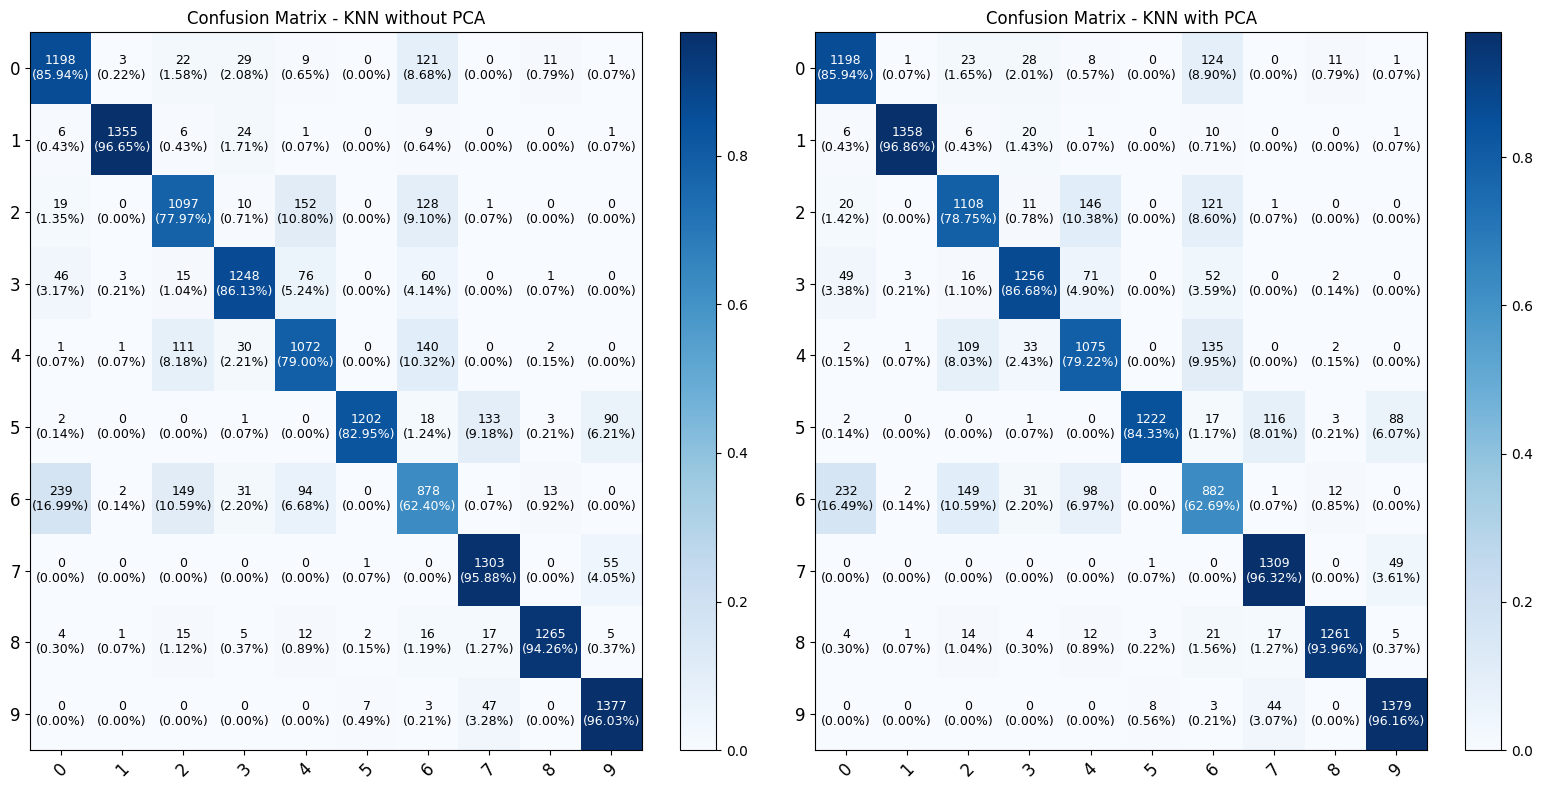

In [ ]:
import matplotlib.pyplot as plt
import itertools

# Set figure size and spacing
plt.figure(figsize=(16, 8))
plt.subplots_adjust(wspace=0.4)

# Define class names
class_names = [str(i) for i in range(10)]

# Plot confusion matrix without PCA
plt.subplot(1, 2, 1)
plt.imshow(cm_without_pca_percent, interpolation='nearest', cmap=plt.cm.Blues, aspect='auto')
plt.title("Confusion Matrix - KNN without PCA")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, fontsize=12)
plt.yticks(tick_marks, class_names, fontsize=12)

# Add number and percentage values to confusion matrix without PCA
thresh = cm_without_pca_percent.max() / 2.
for i, j in itertools.product(range(cm_without_pca_percent.shape[0]), range(cm_without_pca_percent.shape[1])):
    plt.text(j, i, f'{cm_without_pca[i, j]}\n({cm_without_pca_percent[i, j]*100:.2f}%)',
             horizontalalignment='center', verticalalignment='center',
             color='white' if cm_without_pca_percent[i, j] > thresh else 'black', fontsize=9)

# Plot confusion matrix with PCA
plt.subplot(1, 2, 2)
plt.imshow(cm_with_pca_percent, interpolation='nearest', cmap=plt.cm.Blues, aspect='auto')
plt.title("Confusion Matrix - KNN with PCA")
plt.colorbar()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45, fontsize=12)
plt.yticks(tick_marks, class_names, fontsize=12)

# Add number and percentage values to confusion matrix with PCA
thresh = cm_with_pca_percent.max() / 2.
for i, j in itertools.product(range(cm_with_pca_percent.shape[0]), range(cm_with_pca_percent.shape[1])):
    plt.text(j, i, f'{cm_with_pca[i, j]}\n({cm_with_pca_percent[i, j]*100:.2f}%)',
             horizontalalignment='center', verticalalignment='center',
             color='white' if cm_with_pca_percent[i, j] > thresh else 'black', fontsize=9)

# Set the layout and save the figure as PDF
plt.tight_layout()
plt.savefig('PCAconfusionmatrix.pdf')

# Show the plot
plt.show()


## ISOMAP

Without ISOMAP:
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       204
           1       0.99      0.93      0.96       216
           2       0.67      0.77      0.72       195
           3       0.85      0.86      0.86       193
           4       0.74      0.70      0.72       199
           5       1.00      0.78      0.87       215
           6       0.61      0.53      0.56       188
           7       0.83      0.92      0.87       201
           8       0.95      0.92      0.93       200
           9       0.85      0.98      0.91       189

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.83      0.82      0.82      2000

KNN Execution Time: 0.82 seconds


With ISOMAP:
Best Parameters for ISOMAP: {'n_neighbors': 5, 'n_components': 10}
KNN Classification Report:
              precision    recall  f1-score   support

 

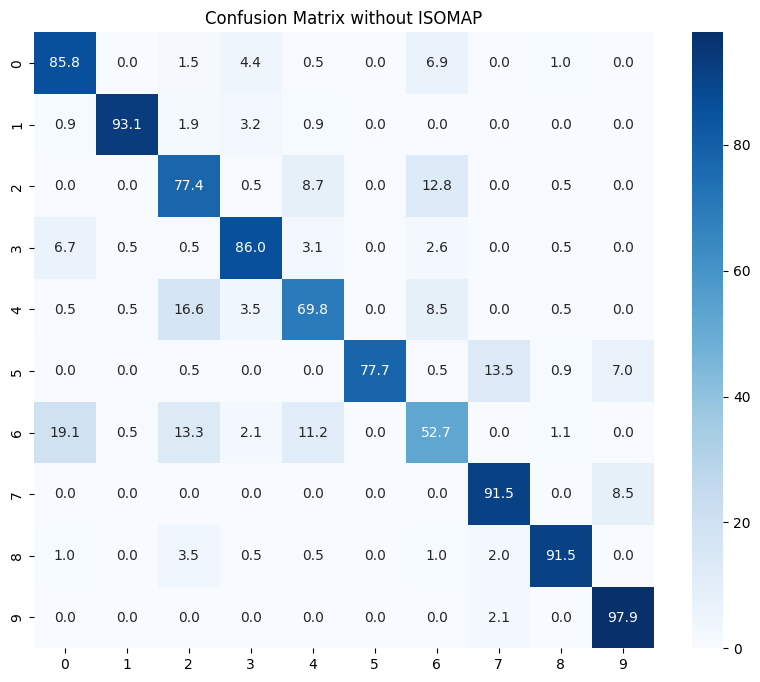

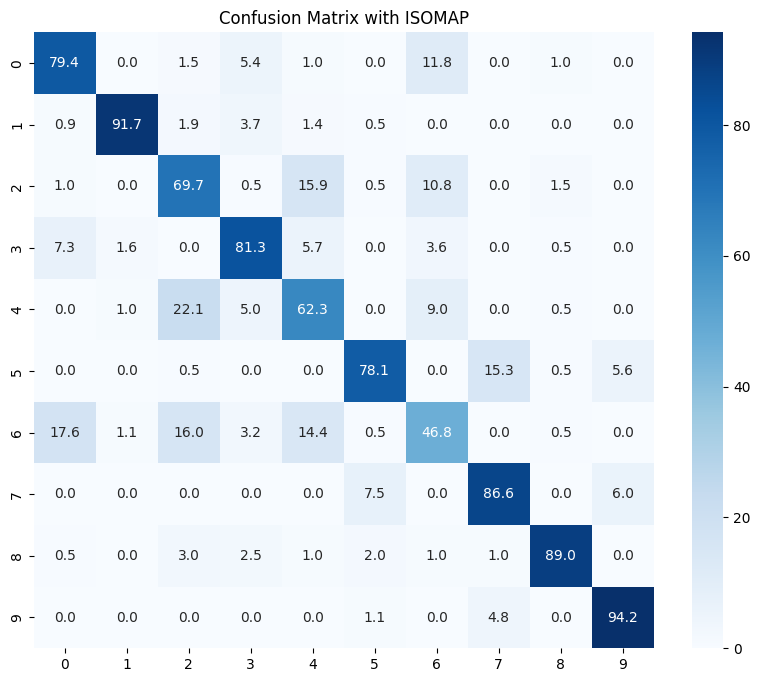

In [ ]:
import numpy as np
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load Fashion MNIST dataset (use a smaller subset)
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
# subset_indices = np.random.choice(len(X), size=10000, replace=False)
# X = X[subset_indices]
# y = y[subset_indices]

# Preprocess data
X = X / 255.0

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate KNN classifier
def evaluate_knn(X_train, y_train, X_test, y_test):
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    end_time = time.time()
    execution_time = end_time - start_time
    print("KNN Classification Report:")
    print(classification_report(y_test, y_pred))
    print("KNN Execution Time: {:.2f} seconds".format(execution_time))
    print("\n")
    return y_pred, execution_time

# Without ISOMAP
print("Without ISOMAP:")
y_pred_no_isomap, execution_time_no_isomap = evaluate_knn(X_train, y_train, X_test, y_test)

# With ISOMAP
print("With ISOMAP:")
n_components = np.arange(10, 31, 10)  # Reduce the range of components
n_neighbors = np.arange(5, 11, 5)  # Reduce the range of neighbors
param_grid = {'n_components': n_components, 'n_neighbors': n_neighbors}

# Custom scoring function for mean accuracy
def custom_score(estimator, X, y):
    y_pred = estimator.predict(X)
    return accuracy_score(y, y_pred)

random_search = RandomizedSearchCV(Isomap(), param_distributions=param_grid, n_iter=10, cv=3, random_state=42, scoring=custom_score)
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
execution_time_with_isomap = end_time - start_time
best_params = random_search.best_params_
print("Best Parameters for ISOMAP:", best_params)
X_train_isomap = random_search.transform(X_train)
X_test_isomap = random_search.transform(X_test)
y_pred_with_isomap, _ = evaluate_knn(X_train_isomap, y_train, X_test_isomap, y_test)
print("ISOMAP Execution Time: {:.2f} seconds".format(execution_time_with_isomap))
print("\n")

# Confusion matrix without ISOMAP
plt.figure(figsize=(10, 8))
cm_no_isomap = confusion_matrix(y_test, y_pred_no_isomap)
cm_percent_no_isomap = cm_no_isomap / cm_no_isomap.sum(axis=1)[:, np.newaxis] * 100  # Calculate percentages
sns.heatmap(cm_percent_no_isomap, annot=True, fmt='.1f', cmap='Blues')  # Display as floating-point values with one decimal place
plt.title("Confusion Matrix without ISOMAP")
plt.savefig("confusion_matrix_no_isomap.pdf")
plt.show()

# Confusion matrix with ISOMAP
plt.figure(figsize=(10, 8))
cm_with_isomap = confusion_matrix(y_test, y_pred_with_isomap)
cm_percent_with_isomap = cm_with_isomap / cm_with_isomap.sum(axis=1)[:, np.newaxis] * 100  # Calculate percentages
sns.heatmap(cm_percent_with_isomap, annot=True, fmt='.1f', cmap='Blues')  # Display as floating-point values with one decimal place
plt.title("Confusion Matrix with ISOMAP")
plt.savefig("confusion_matrix_with_isomap.pdf")
plt.show()

# Clear unnecessary data from memory
del X, y, subset_indices, X_train_isomap, X_test_isomap, random_search


Without ISOMAP:
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       106
           1       0.95      0.97      0.96        92
           2       0.67      0.75      0.71       110
           3       0.83      0.80      0.81       112
           4       0.71      0.65      0.68        99
           5       0.99      0.73      0.84        99
           6       0.55      0.50      0.52       100
           7       0.75      0.93      0.83        91
           8       0.99      0.82      0.89        98
           9       0.88      0.95      0.91        93

    accuracy                           0.79      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.80      0.79      0.79      1000

KNN Execution Time: 0.30 seconds


With ISOMAP:
Best Parameters for ISOMAP: {'n_neighbors': 5, 'n_components': 10}
KNN Classification Report:
              precision    recall  f1-score   support

 

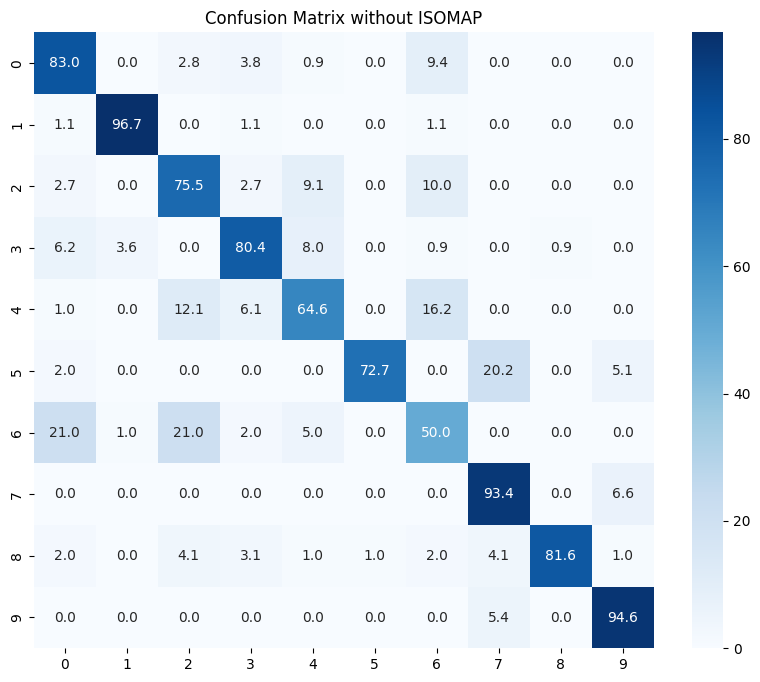

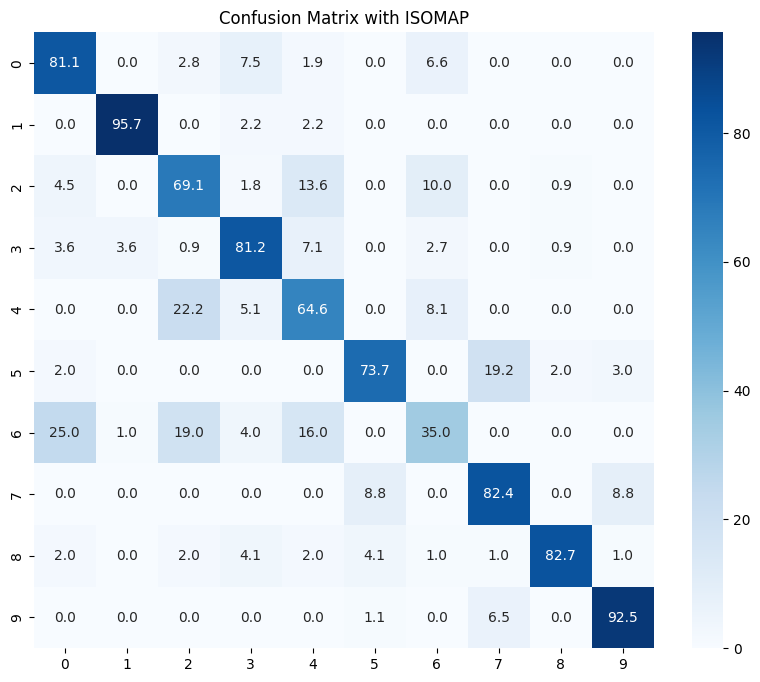

In [ ]:
import numpy as np
import time
from sklearn.datasets import fetch_openml
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load Fashion MNIST dataset (use a smaller subset)
X, y = fetch_openml('Fashion-MNIST', version=1, return_X_y=True, as_frame=False)
subset_indices = np.random.choice(len(X), size=5000, replace=False)
X = X[subset_indices]
y = y[subset_indices]

# Preprocess data
X = X / 255.0

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate KNN classifier
def evaluate_knn(X_train, y_train, X_test, y_test):
    start_time = time.time()
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    end_time = time.time()
    execution_time = end_time - start_time
    print("KNN Classification Report:")
    print(classification_report(y_test, y_pred))
    print("KNN Execution Time: {:.2f} seconds".format(execution_time))
    print("\n")
    return y_pred, execution_time

# Without ISOMAP
print("Without ISOMAP:")
y_pred_no_isomap, execution_time_no_isomap = evaluate_knn(X_train, y_train, X_test, y_test)

# With ISOMAP
print("With ISOMAP:")
n_components = np.arange(10, 31, 10)  # Reduce the range of components
n_neighbors = np.arange(5, 11, 5)  # Reduce the range of neighbors
param_grid = {'n_components': n_components, 'n_neighbors': n_neighbors}

# Custom scoring function for mean accuracy
def custom_score(estimator, X, y):
    y_pred = estimator.predict(X)
    return accuracy_score(y, y_pred)

random_search = RandomizedSearchCV(Isomap(), param_distributions=param_grid, n_iter=10, cv=3, random_state=42, scoring=custom_score)
start_time = time.time()
random_search.fit(X_train, y_train)
end_time = time.time()
execution_time_with_isomap = end_time - start_time
best_params = random_search.best_params_
print("Best Parameters for ISOMAP:", best_params)
X_train_isomap = random_search.transform(X_train)
X_test_isomap = random_search.transform(X_test)
y_pred_with_isomap, _ = evaluate_knn(X_train_isomap, y_train, X_test_isomap, y_test)
print("ISOMAP Execution Time: {:.2f} seconds".format(execution_time_with_isomap))
print("\n")

# Confusion matrix without ISOMAP
plt.figure(figsize=(10, 8))
cm_no_isomap = confusion_matrix(y_test, y_pred_no_isomap)
cm_percent_no_isomap = cm_no_isomap / cm_no_isomap.sum(axis=1)[:, np.newaxis] * 100  # Calculate percentages
sns.heatmap(cm_percent_no_isomap, annot=True, fmt='.1f', cmap='Blues')  # Display as floating-point values with one decimal place
plt.title("Confusion Matrix without ISOMAP")
plt.savefig("confusion_matrix_no_isomap.pdf")
plt.show()

# Confusion matrix with ISOMAP
plt.figure(figsize=(10, 8))
cm_with_isomap = confusion_matrix(y_test, y_pred_with_isomap)
cm_percent_with_isomap = cm_with_isomap / cm_with_isomap.sum(axis=1)[:, np.newaxis] * 100  # Calculate percentages
sns.heatmap(cm_percent_with_isomap, annot=True, fmt='.1f', cmap='Blues')  # Display as floating-point values with one decimal place
plt.title("Confusion Matrix with ISOMAP")
plt.savefig("confusion_matrix_with_isomap.pdf")
plt.show()

# Clear unnecessary data from memory
del X, y, subset_indices, X_train_isomap, X_test_isomap, random_search


# 1.3.

## DAE

GPU device found. Using GPU.
Epoch 1/15
843/843 [==============================] - 14s 10ms/step - loss: 0.0233 - val_loss: 0.0170
Epoch 2/15
843/843 [==============================] - 6s 7ms/step - loss: 0.0159 - val_loss: 0.0153
Epoch 3/15
843/843 [==============================] - 5s 6ms/step - loss: 0.0143 - val_loss: 0.0136
Epoch 4/15
843/843 [==============================] - 6s 7ms/step - loss: 0.0133 - val_loss: 0.0129
Epoch 5/15
843/843 [==============================] - 6s 7ms/step - loss: 0.0127 - val_loss: 0.0125
Epoch 6/15
843/843 [==============================] - 6s 7ms/step - loss: 0.0122 - val_loss: 0.0121
Epoch 7/15
843/843 [==============================] - 5s 6ms/step - loss: 0.0119 - val_loss: 0.0116
Epoch 8/15
843/843 [==============================] - 6s 7ms/step - loss: 0.0116 - val_loss: 0.0111
Epoch 9/15
843/843 [==============================] - 5s 6ms/step - loss: 0.0113 - val_loss: 0.0109
Epoch 10/15
843/843 [==============================] - 6s 7ms/step - 

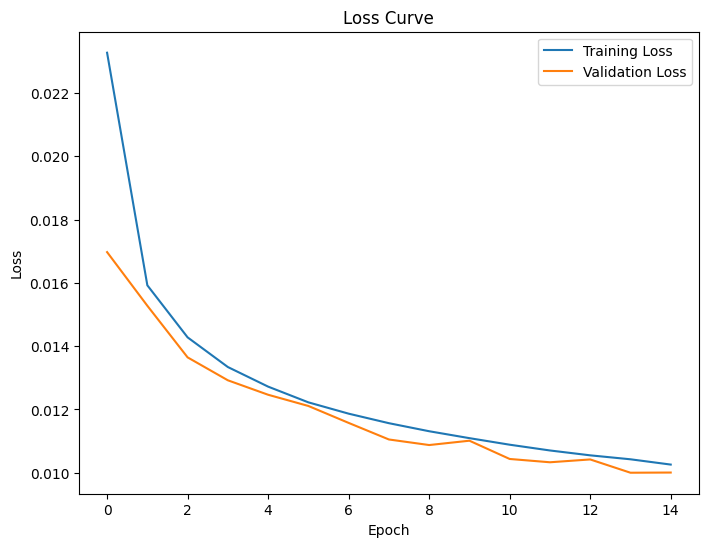

313/313 [==============================] - 1s 1ms/step
Epoch 1/15
843/843 [==============================] - 11s 8ms/step - loss: 0.0233 - val_loss: 0.0173
Epoch 2/15
843/843 [==============================] - 5s 6ms/step - loss: 0.0158 - val_loss: 0.0150
Epoch 3/15
843/843 [==============================] - 7s 8ms/step - loss: 0.0142 - val_loss: 0.0127
Epoch 4/15
843/843 [==============================] - 5s 6ms/step - loss: 0.0132 - val_loss: 0.0120
Epoch 5/15
843/843 [==============================] - 6s 7ms/step - loss: 0.0125 - val_loss: 0.0118
Epoch 6/15
843/843 [==============================] - 5s 6ms/step - loss: 0.0120 - val_loss: 0.0112
Epoch 7/15
843/843 [==============================] - 6s 7ms/step - loss: 0.0116 - val_loss: 0.0113
Epoch 8/15
843/843 [==============================] - 5s 6ms/step - loss: 0.0113 - val_loss: 0.0106
Epoch 9/15
843/843 [==============================] - 6s 7ms/step - loss: 0.0110 - val_loss: 0.0106
Epoch 10/15
843/843 [=======================

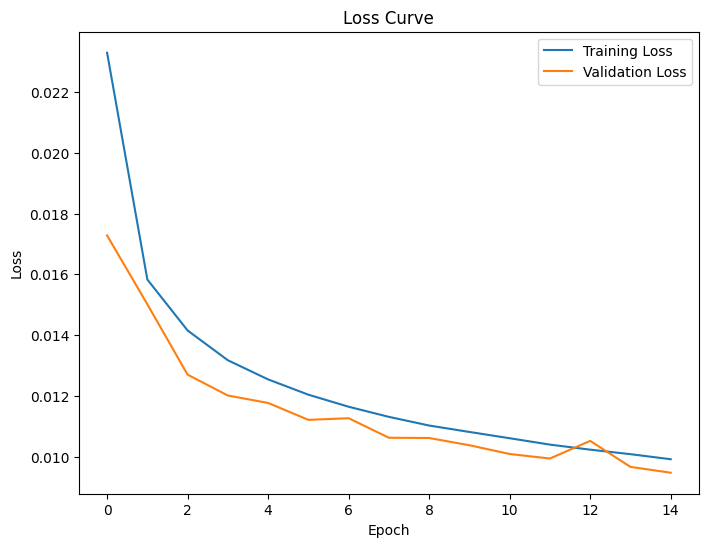

313/313 [==============================] - 0s 2ms/step


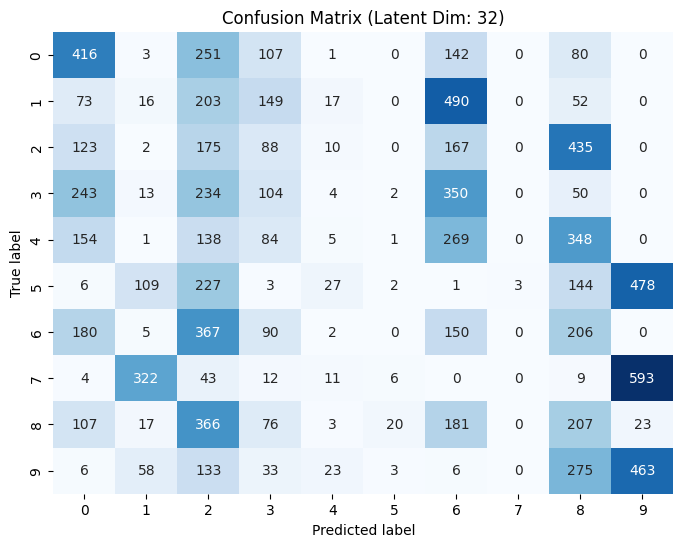

313/313 [==============================] - 1s 2ms/step


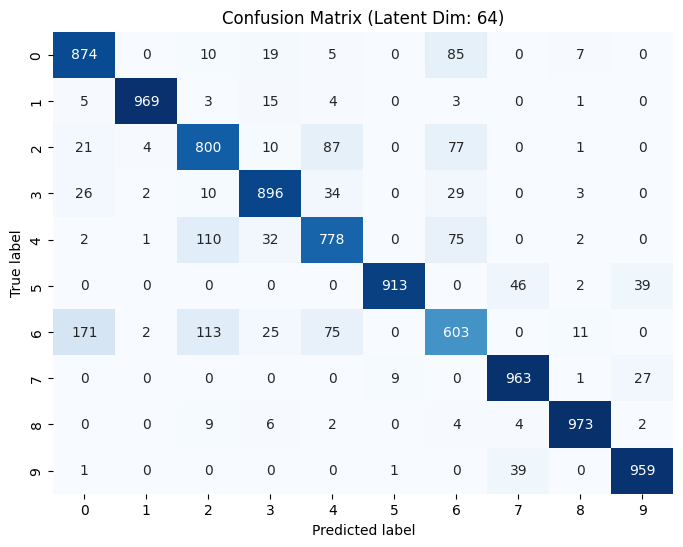

313/313 [==============================] - 1s 2ms/step
Performance metrics for Latent Dim: 32
Accuracy: 0.1538
Precision: 0.1172
Recall: 0.1538
F1 Score: 0.1243
-----------------------------------------
313/313 [==============================] - 1s 2ms/step
Performance metrics for Latent Dim: 64
Accuracy: 0.8728
Precision: 0.8726
Recall: 0.8728
F1 Score: 0.8719
-----------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
import tensorflow as tf

# Check if GPU is available
if tf.test.gpu_device_name() == '':
    print('GPU device not found. Using CPU.')
else:
    print('GPU device found. Using GPU.')

class DAE:
    def __init__(self, input_dim, batch_size, latent_dim):
        self.input_dim = input_dim
        self.batch_size = batch_size
        self.latent_dim = latent_dim
        input_img = Input(shape=(self.input_dim, ))

        # 'encoded' is the encoded representation of the input
        encoded = Dense(int(self.input_dim / 2), kernel_initializer='glorot_uniform')(input_img)
        encoded = BatchNormalization()(encoded)
        encoded = Activation('relu')(encoded)

        encoded = Dense(int(self.input_dim / 4), kernel_initializer='glorot_uniform')(encoded)
        encoded = BatchNormalization()(encoded)
        encoded = Activation('relu')(encoded)

        encoded = Dense(int(self.input_dim / 8), kernel_initializer='glorot_uniform')(encoded)
        encoded = BatchNormalization()(encoded)
        encoded = Activation('relu')(encoded)

        encoded = Dense(self.latent_dim, activation='linear')(encoded)

        # 'decoded' is the lossy reconstruction of the input
        decoded = Dense(int(self.input_dim / 8), kernel_initializer='glorot_uniform')(encoded)
        decoded = BatchNormalization()(decoded)
        decoded = Activation('relu')(decoded)

        decoded = Dense(int(self.input_dim / 4), kernel_initializer='glorot_uniform')(decoded)
        decoded = BatchNormalization()(decoded)
        decoded = Activation('relu')(decoded)

        decoded = Dense(int(self.input_dim / 2), kernel_initializer='glorot_uniform')(decoded)
        decoded = BatchNormalization()(decoded)
        decoded = Activation('relu')(decoded)

        decoded = Dense(self.input_dim, activation='sigmoid', kernel_initializer='glorot_uniform')(decoded)

        self.autoencoder = Model(inputs=input_img, outputs=decoded)
        self.autoencoder.compile(optimizer=Adam(), loss='mse')
        self.encoder = Model(inputs=input_img, outputs=encoded)

    def fit(self, x_train):
        x_train, x_valid = train_test_split(
            x_train,
            test_size=int(0.1 * x_train.shape[0] // self.batch_size * self.batch_size),
            train_size=int(0.9 * x_train.shape[0] // self.batch_size * self.batch_size),
            stratify=y_train)

        with tf.device('/device:GPU:0'):
            history = self.autoencoder.fit(
                x_train,
                x_train,
                epochs=15,
                batch_size=self.batch_size,
                validation_data=(x_valid, x_valid),
                verbose=1,
                callbacks=[
                    callbacks.EarlyStopping(
                        monitor='val_loss',
                        min_delta=0.0001,
                        patience=10,
                        restore_best_weights=True),
                    callbacks.CSVLogger('training_log.csv')
                ])

        # Plot and save loss curve
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss Curve')
        plt.legend()
        plt.savefig('loss_curve.pdf')
        plt.show()
        return self

    def transform(self, x):
        with tf.device('/device:GPU:0'):
            prediction = self.encoder.predict(x)
        return prediction.reshape((len(prediction), np.prod(prediction.shape[1:])))

# Load the fashion_mnist dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# Initialize and train the autoencoder
latent_dim_values = [32, 64]  # Different values for latent dimension
classifiers = []
for latent_dim in latent_dim_values:
    dae = DAE(input_dim=784, batch_size=64, latent_dim=latent_dim)
    dae.fit(x_train)
    x_train_encoded = dae.transform(x_train)
    x_test_encoded = dae.transform(x_test)

    # Train a KNN classifier on the reduced dimensional space
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(x_train_encoded, y_train)
    classifiers.append((knn, latent_dim))

# Evaluate and plot confusion matrix for each classifier
for knn, latent_dim in classifiers:
    x_test_encoded = dae.transform(x_test)
    x_test_encoded = x_test_encoded[:, :latent_dim]  # Adjust the number of features
    y_pred = knn.predict(x_test_encoded)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix (Latent Dim: {latent_dim})')
    plt.savefig(f'confusion_matrix_latent_dim_{latent_dim}.pdf')
    plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate and print performance metrics for each classifier
for knn, latent_dim in classifiers:
    x_test_encoded = dae.transform(x_test)
    x_test_encoded = x_test_encoded[:, :latent_dim]  # Adjust the number of features
    y_pred = knn.predict(x_test_encoded)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Performance metrics for Latent Dim: {latent_dim}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-----------------------------------------")


## CAE

GPU device found. Using GPU.
Epoch 1/15
843/843 [==============================] - 13s 6ms/step - loss: 0.0299 - val_loss: 0.0177
Epoch 2/15
843/843 [==============================] - 4s 5ms/step - loss: 0.0162 - val_loss: 0.0149
Epoch 3/15
843/843 [==============================] - 4s 5ms/step - loss: 0.0143 - val_loss: 0.0137
Epoch 4/15
843/843 [==============================] - 5s 5ms/step - loss: 0.0132 - val_loss: 0.0127
Epoch 5/15
843/843 [==============================] - 4s 5ms/step - loss: 0.0125 - val_loss: 0.0121
Epoch 6/15
843/843 [==============================] - 4s 5ms/step - loss: 0.0120 - val_loss: 0.0117
Epoch 7/15
843/843 [==============================] - 5s 5ms/step - loss: 0.0116 - val_loss: 0.0114
Epoch 8/15
843/843 [==============================] - 4s 5ms/step - loss: 0.0114 - val_loss: 0.0111
Epoch 9/15
843/843 [==============================] - 4s 5ms/step - loss: 0.0112 - val_loss: 0.0111
Epoch 10/15
843/843 [==============================] - 5s 5ms/step - l

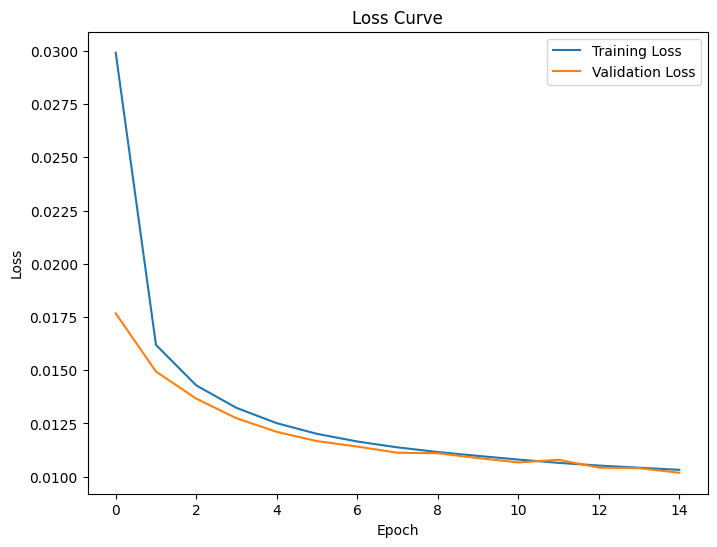

313/313 [==============================] - 1s 2ms/step
Epoch 1/15
843/843 [==============================] - 7s 6ms/step - loss: 0.0275 - val_loss: 0.0171
Epoch 2/15
843/843 [==============================] - 4s 5ms/step - loss: 0.0156 - val_loss: 0.0145
Epoch 3/15
843/843 [==============================] - 4s 5ms/step - loss: 0.0137 - val_loss: 0.0132
Epoch 4/15
843/843 [==============================] - 5s 5ms/step - loss: 0.0126 - val_loss: 0.0122
Epoch 5/15
843/843 [==============================] - 4s 5ms/step - loss: 0.0118 - val_loss: 0.0115
Epoch 6/15
843/843 [==============================] - 4s 5ms/step - loss: 0.0111 - val_loss: 0.0111
Epoch 7/15
843/843 [==============================] - 5s 5ms/step - loss: 0.0107 - val_loss: 0.0106
Epoch 8/15
843/843 [==============================] - 4s 5ms/step - loss: 0.0103 - val_loss: 0.0107
Epoch 9/15
843/843 [==============================] - 4s 5ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 10/15
843/843 [========================

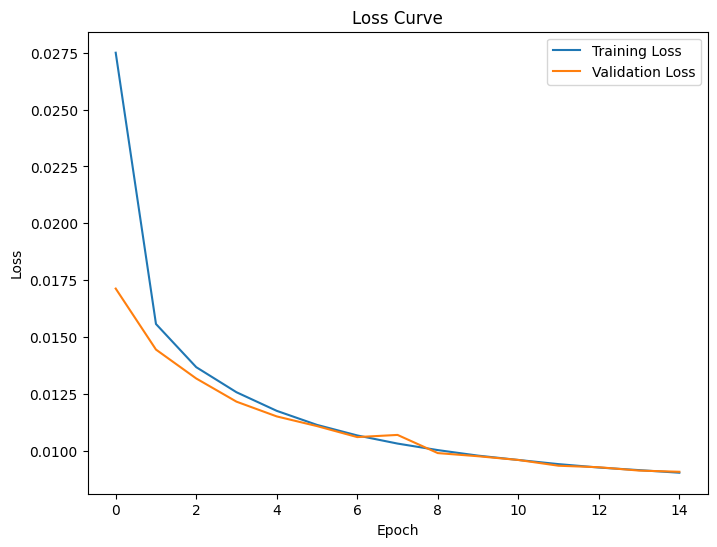

313/313 [==============================] - 1s 2ms/step


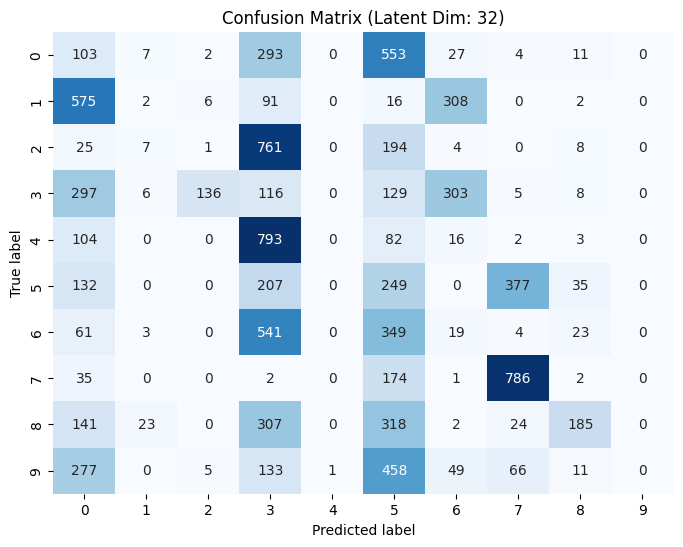

313/313 [==============================] - 1s 2ms/step


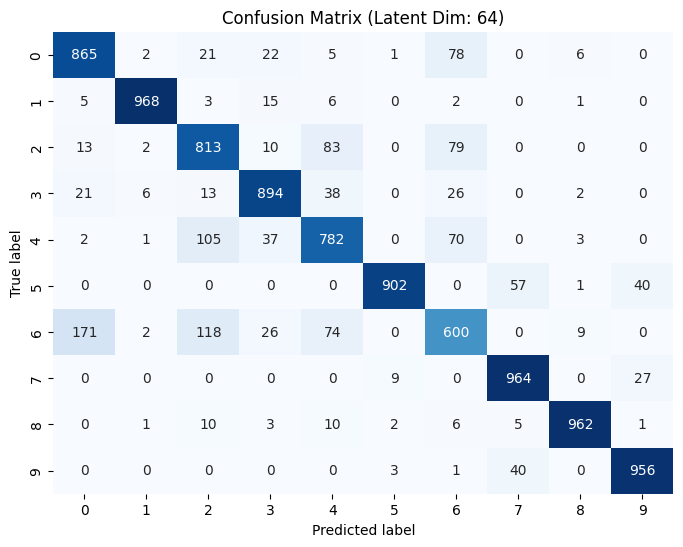

313/313 [==============================] - 0s 2ms/step
Performance metrics for Latent Dim: 32
Accuracy: 0.1461
Precision: 0.1530
Recall: 0.1461
F1 Score: 0.1279
-----------------------------------------
 70/313 [=====>........................] - ETA: 0s

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


313/313 [==============================] - 0s 1ms/step
Performance metrics for Latent Dim: 64
Accuracy: 0.8706
Precision: 0.8706
Recall: 0.8706
F1 Score: 0.8697
-----------------------------------------


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Conv2D, MaxPooling2D, Flatten, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
import tensorflow as tf

# Check if GPU is available
if tf.test.gpu_device_name() == '':
    print('GPU device not found. Using CPU.')
else:
    print('GPU device found. Using GPU.')

class CE:
    def __init__(self, input_shape, batch_size, latent_dim):
        self.input_shape = input_shape
        self.batch_size = batch_size
        self.latent_dim = latent_dim
        input_img = Input(shape=self.input_shape)

        # Encoder
        encoded = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(input_img)
        encoded = MaxPooling2D(pool_size=(2, 2), padding='same')(encoded)
        encoded = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(encoded)
        encoded = MaxPooling2D(pool_size=(2, 2), padding='same')(encoded)
        encoded = Flatten()(encoded)
        encoded = Dense(self.latent_dim, activation='linear')(encoded)

        # Decoder
        decoded = Dense(7 * 7 * 8, activation='relu')(encoded)
        decoded = Reshape((7, 7, 8))(decoded)
        decoded = Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same')(decoded)
        decoded = UpSampling2D((2, 2))(decoded)
        decoded = Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(decoded)
        decoded = UpSampling2D((2, 2))(decoded)
        decoded = Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(decoded)

        self.autoencoder = Model(inputs=input_img, outputs=decoded)
        self.autoencoder.compile(optimizer=Adam(), loss='mse')
        self.encoder = Model(inputs=input_img, outputs=encoded)

    def fit(self, x_train):
        x_train, x_valid = train_test_split(
            x_train,
            test_size=int(0.1 * x_train.shape[0] // self.batch_size * self.batch_size),
            train_size=int(0.9 * x_train.shape[0] // self.batch_size * self.batch_size),
            stratify=y_train)

        with tf.device('/device:GPU:0'):
            history = self.autoencoder.fit(
                x_train,
                x_train,
                epochs=15,
                batch_size=self.batch_size,
                validation_data=(x_valid, x_valid),
                verbose=1,
                callbacks=[
                    callbacks.EarlyStopping(
                        monitor='val_loss',
                        min_delta=0.0001,
                        patience=10,
                        restore_best_weights=True),
                    callbacks.CSVLogger('training_log.csv')
                ])

        # Plot and save loss curve
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('Loss Curve')
        plt.legend()
        plt.savefig('loss_curve.pdf')
        plt.show()
        return self

    def transform(self, x):
        with tf.device('/device:GPU:0'):
            prediction = self.encoder.predict(x)
        return prediction

# Load the fashion_mnist dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Initialize and train the autoencoder
latent_dim_values = [32, 64]  # Different values for latent dimension
classifiers = []
for latent_dim in latent_dim_values:
    ce = CE(input_shape=(28, 28, 1), batch_size=64, latent_dim=latent_dim)
    ce.fit(x_train)
    x_train_encoded = ce.transform(x_train)
    x_test_encoded = ce.transform(x_test)

    # Train a KNN classifier on the reduced dimensional space
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(x_train_encoded, y_train)
    classifiers.append((knn, latent_dim))

# Evaluate and plot confusion matrix for each classifier
for knn, latent_dim in classifiers:
    x_test_encoded = ce.transform(x_test)
    x_test_encoded = x_test_encoded[:, :latent_dim]  # Adjust the number of features
    y_pred = knn.predict(x_test_encoded)
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title(f'Confusion Matrix (Latent Dim: {latent_dim})')
    plt.savefig(f'confusion_matrix_latent_dim_{latent_dim}.pdf')
    plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate and print performance metrics for each classifier
for knn, latent_dim in classifiers:
    x_test_encoded = ce.transform(x_test)
    x_test_encoded = x_test_encoded[:, :latent_dim]  # Adjust the number of features
    y_pred = knn.predict(x_test_encoded)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Performance metrics for Latent Dim: {latent_dim}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-----------------------------------------")


# 1.4 & 1.5.

## DVAE

4422102/4422102 [==============================] - 2s 0us/step


<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Epoch 1/15
1688/1688 [==============================] - 33s 13ms/step - loss: 0.4790 - val_loss: 0.4556
Epoch 2/15
1688/1688 [==============================] - 16s 9ms/step - loss: 0.4432 - val_loss: 0.4417
Epoch 3/15
1688/1688 [==============================] - 14s 8ms/step - loss: 0.4376 - val_loss: 0.4385
Epoch 4/15
1688/1688 [==============================] - 20s 12ms/step - loss: 0.4362 - val_loss: 0.4400
Epoch 5/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4356 - val_loss: 0.4387
Epoch 6/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4349 - val_loss: 0.4409
Epoch 7/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4343 - val_loss: 0.4378
Epoch 8/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4340 - val_loss: 0.4368
Epoch 9/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4336 - val_loss: 0.4383
Epoch 10/15
1688/1688 [==============================] - 11s 7ms/step -

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


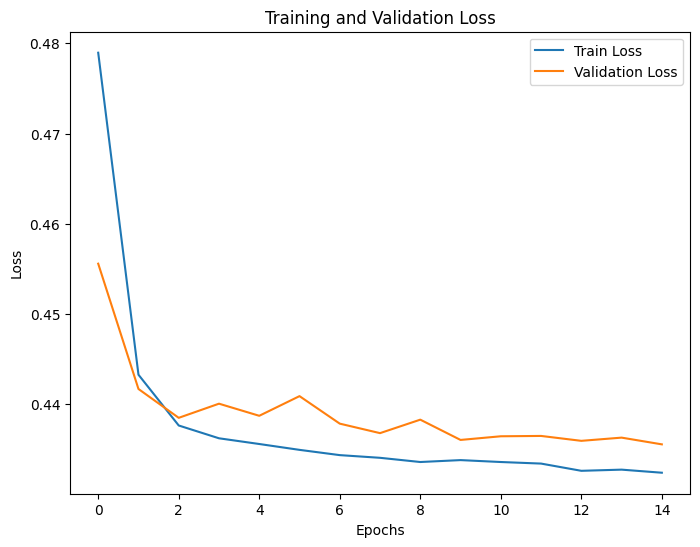

313/313 [==============================] - 1s 1ms/step
Latent Dimension: 32
              precision    recall  f1-score   support

           0       0.63      0.79      0.70      1000
           1       0.88      0.79      0.83      1000
           2       0.50      0.61      0.55      1000
           3       0.64      0.73      0.68      1000
           4       0.57      0.57      0.57      1000
           5       0.78      0.84      0.81      1000
           6       0.47      0.25      0.33      1000
           7       0.82      0.79      0.80      1000
           8       0.81      0.78      0.79      1000
           9       0.89      0.85      0.87      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.69     10000
weighted avg       0.70      0.70      0.69     10000



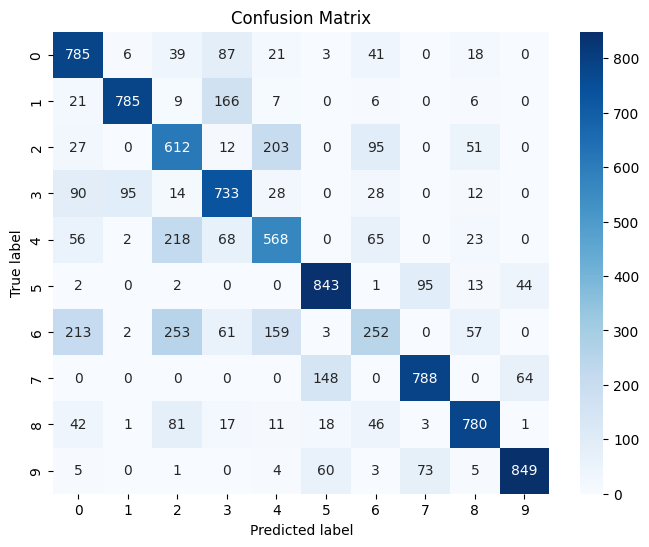

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


4/4 [==============================] - 0s 3ms/step


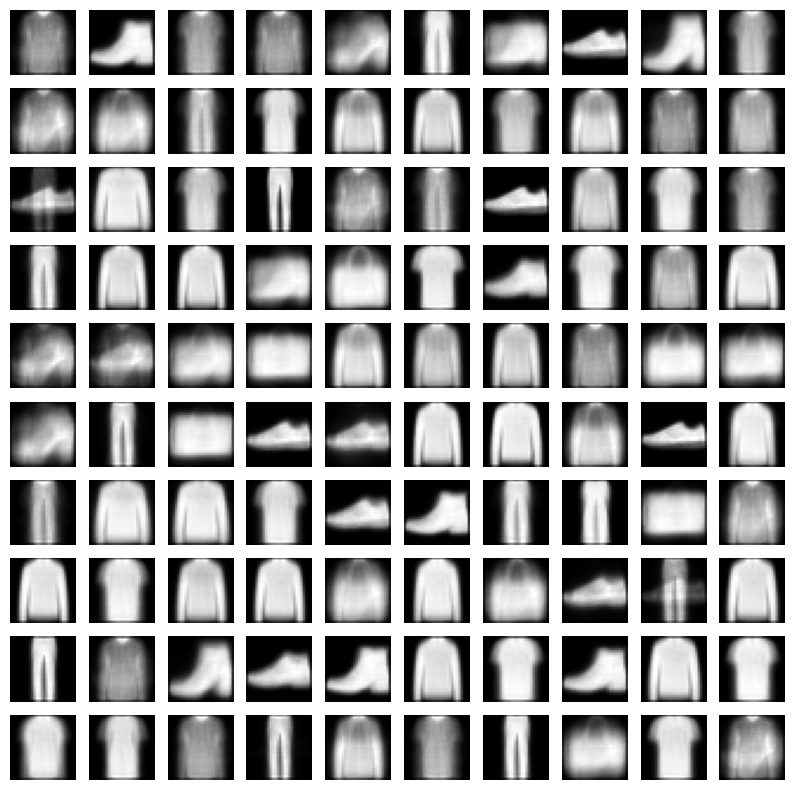

1875/1875 [==============================] - 3s 2ms/step


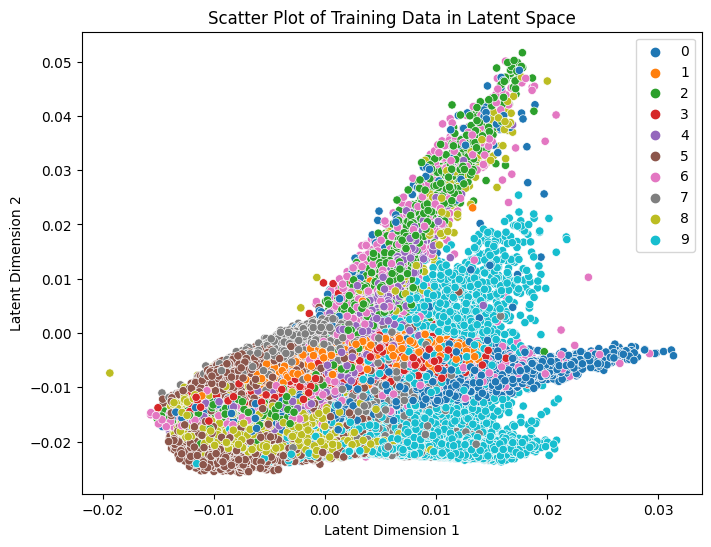

Epoch 1/15
1688/1688 [==============================] - 16s 7ms/step - loss: 0.4473 - val_loss: 0.4162
Epoch 2/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4056 - val_loss: 0.4048
Epoch 3/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.3995 - val_loss: 0.4026
Epoch 4/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3970 - val_loss: 0.3995
Epoch 5/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3958 - val_loss: 0.3985
Epoch 6/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3951 - val_loss: 0.3969
Epoch 7/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3943 - val_loss: 0.3969
Epoch 8/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3937 - val_loss: 0.3964
Epoch 9/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.3933 - val_loss: 0.3961
Epoch 10/15
1688/1688 [==============================] - 11s 7ms/step - l

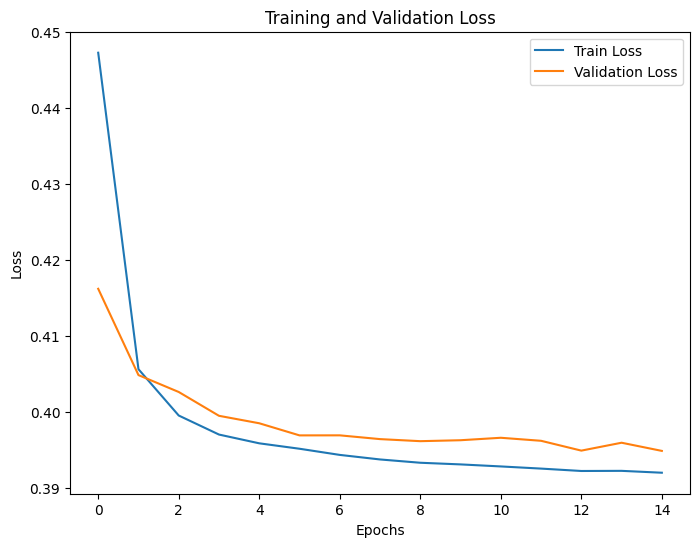

313/313 [==============================] - 1s 2ms/step
Latent Dimension: 64
              precision    recall  f1-score   support

           0       0.71      0.79      0.74      1000
           1       0.97      0.82      0.89      1000
           2       0.51      0.65      0.57      1000
           3       0.67      0.82      0.74      1000
           4       0.54      0.55      0.54      1000
           5       0.81      0.86      0.83      1000
           6       0.49      0.25      0.33      1000
           7       0.83      0.80      0.81      1000
           8       0.91      0.92      0.92      1000
           9       0.88      0.87      0.87      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000



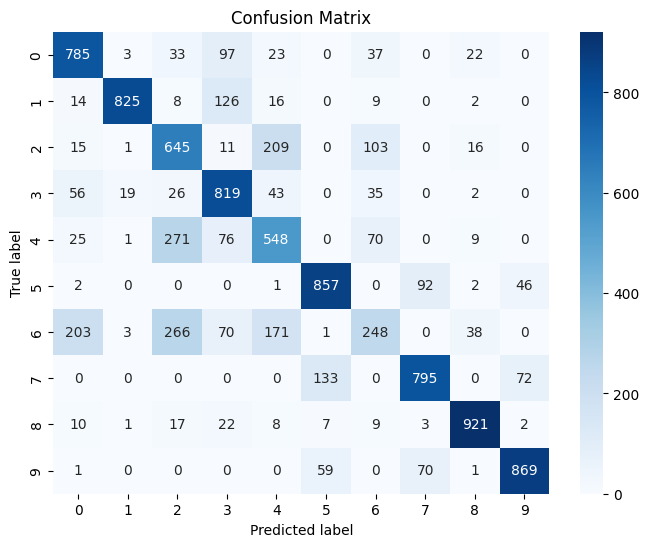

4/4 [==============================] - 0s 3ms/step


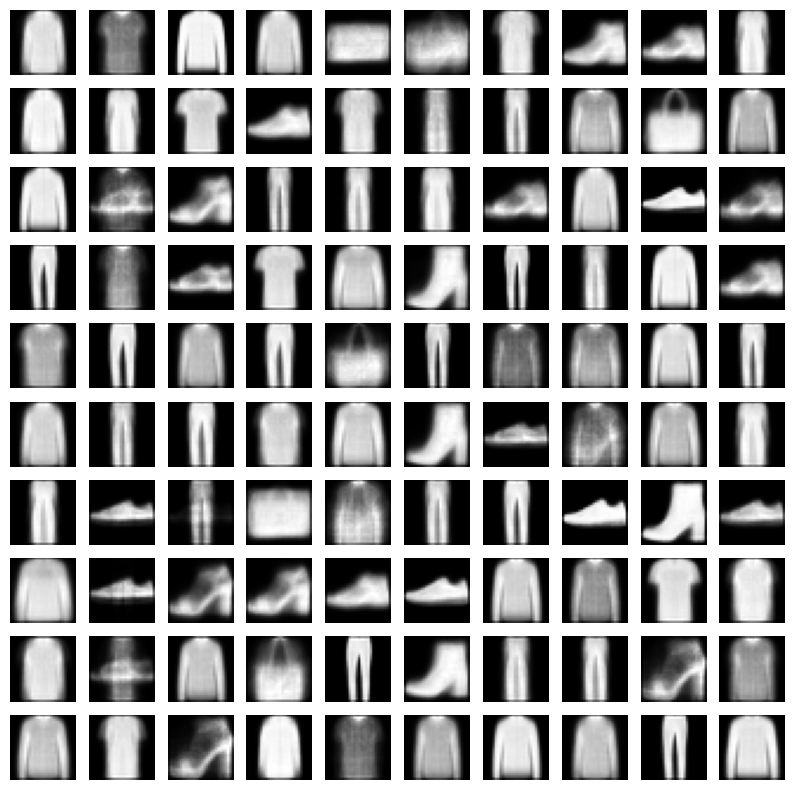

1875/1875 [==============================] - 3s 2ms/step


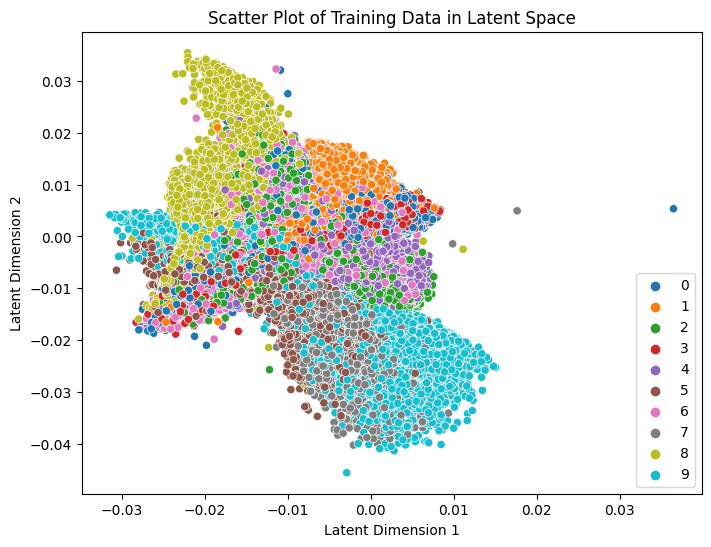

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=Warning)
warnings.filterwarnings("default", category=Warning)

# Load the fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
scaler = MinMaxScaler()
train_images = train_images.reshape(train_images.shape[0], -1) / 255.0
test_images = test_images.reshape(test_images.shape[0], -1) / 255.0

# Define the VAE class
class VAE:
    def __init__(self, input_dim, batch_size, latent_dim):
        self.input_dim = input_dim
        self.batch_size = batch_size
        self.latent_dim = latent_dim

        # Encoder
        inputs = keras.Input(shape=(self.input_dim,))
        x = layers.Dense(int(self.input_dim / 2), activation='relu')(inputs)
        x = layers.Dense(int(self.input_dim / 4), activation='relu')(x)
        x = layers.Dense(int(self.input_dim / 8), activation='relu')(x)
        z_mean = layers.Dense(self.latent_dim, name="z_mean")(x)
        z_log_var = layers.Dense(self.latent_dim, name="z_log_var")(x)

        # Sampling layer
        def sampling(args):
            z_mean, z_log_var = args
            epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], self.latent_dim))
            return z_mean + tf.exp(0.5 * z_log_var) * epsilon

        z = layers.Lambda(sampling, name="z")([z_mean, z_log_var])

        # Decoder
        decoder_inputs = layers.Input(shape=(self.latent_dim,))
        x = layers.Dense(int(self.input_dim / 8), activation='relu')(decoder_inputs)
        x = layers.Dense(int(self.input_dim / 4), activation='relu')(x)
        x = layers.Dense(int(self.input_dim / 2), activation='relu')(x)
        outputs = layers.Dense(self.input_dim, activation='sigmoid')(x)

        # Models
        self.encoder = keras.Model(inputs, z_mean)
        self.decoder = keras.Model(decoder_inputs, outputs)
        self.vae = keras.Model(inputs, self.decoder(self.encoder(inputs)))

        # Loss function
        reconstruction_loss = tf.reduce_mean(
            keras.losses.binary_crossentropy(inputs, self.decoder(z)), axis=-1
        )
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
        vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
        self.vae.add_loss(vae_loss)
        self.vae.compile(optimizer='adam')

    def fit(self, x_train, epochs):
        history = self.vae.fit(x_train, x_train, epochs=epochs, batch_size=self.batch_size, validation_split=0.1)
        self.plot_loss(history)

    def transform(self, x):
        return self.encoder.predict(x)

    def plot_loss(self, history):
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.savefig(f'loss_plot_{self.latent_dim}.pdf')
        plt.show()

    def plot_scatter(self, x_train, labels):
        latent_space = self.transform(x_train)
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=latent_space[:, 0], y=latent_space[:, 1], hue=labels, palette='tab10')
        plt.xlabel('Latent Dimension 1')
        plt.ylabel('Latent Dimension 2')
        plt.title('Scatter Plot of Training Data in Latent Space')
        plt.savefig(f'scatter_plot_{self.latent_dim}.pdf')
        plt.show()

# Task 1: Train VAE and classify reduced dimension space with KNN
latent_dims = [32, 64]

for latent_dim in latent_dims:
    # Create VAE instance
    vae = VAE(input_dim=train_images.shape[1], batch_size=32, latent_dim=latent_dim)

    # Train VAE
    vae.fit(train_images, epochs=15)

    # Reduce dimensionality of test data
    reduced_test_images = vae.transform(test_images)

    # Classify reduced dimension space with KNN
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(reduced_test_images, test_labels)
    knn_pred = knn.predict(reduced_test_images)

    # Print classification report
    print(f"Latent Dimension: {latent_dim}")
    print(classification_report(test_labels, knn_pred))

    # Plot confusion matrix
    cm = confusion_matrix(test_labels, knn_pred)
    df_cm = pd.DataFrame(cm, index=np.arange(10), columns=np.arange(10))
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion Matrix")
    plt.savefig(f"confusion_matrix_{latent_dim}.pdf")
    plt.show()

    # Save VAE encoder and decoder networks
    vae.encoder.save(f"encoder_{latent_dim}.h5")
    vae.decoder.save(f"decoder_{latent_dim}.h5")

    # Generate images using the decoder
    n = 10
    latent_samples = np.random.normal(size=(n*n, latent_dim))
    generated_images = vae.decoder.predict(latent_samples)
    generated_images = generated_images.reshape(-1, 28, 28)
    plt.figure(figsize=(10, 10))
    for i in range(n):
        for j in range(n):
            plt.subplot(n, n, i * n + j + 1)
            plt.imshow(generated_images[i * n + j], cmap="gray")
            plt.axis("off")
    plt.savefig(f"generated_images_{latent_dim}.pdf")
    plt.show()

    # Plot scatter plot of training data in latent space
    vae.plot_scatter(train_images, train_labels)


## CVAE

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/15
1688/1688 [==============================] - 35s 8ms/step - loss: 0.4616 - val_loss: 0.4444
Epoch 2/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.4396 - val_loss: 0.4411
Epoch 3/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4370 - val_loss: 0.4398
Epoch 4/15
1688/1688 [==============================] - 18s 11ms/step - loss: 0.4360 - val_loss: 0.4383
Epoch 5/15
1688/1688 [==============================] - 16s 9ms/step - loss: 0.4355 - val_loss: 0.4379
Epoch 6/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4343 - val_loss: 0.4389
Epoch 7/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4339 - val_loss: 0.4372
Epoch 8/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4339 - val_loss: 0.4373
Epoch 9/15
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4332 - val_loss: 0.4357
Epoch 10/

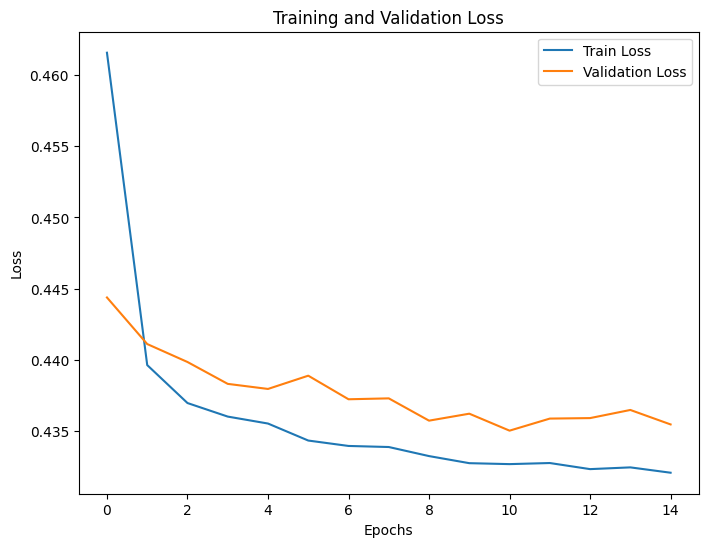

313/313 [==============================] - 1s 1ms/step
Latent Dimension: 32
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1000
           1       0.90      0.83      0.86      1000
           2       0.57      0.71      0.63      1000
           3       0.65      0.79      0.71      1000
           4       0.62      0.60      0.61      1000
           5       0.81      0.86      0.84      1000
           6       0.54      0.36      0.43      1000
           7       0.82      0.79      0.80      1000
           8       0.92      0.90      0.91      1000
           9       0.90      0.87      0.89      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



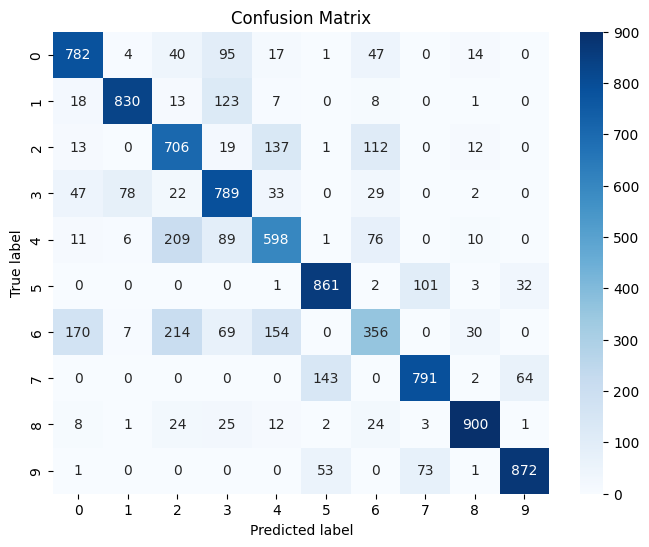

4/4 [==============================] - 0s 17ms/step


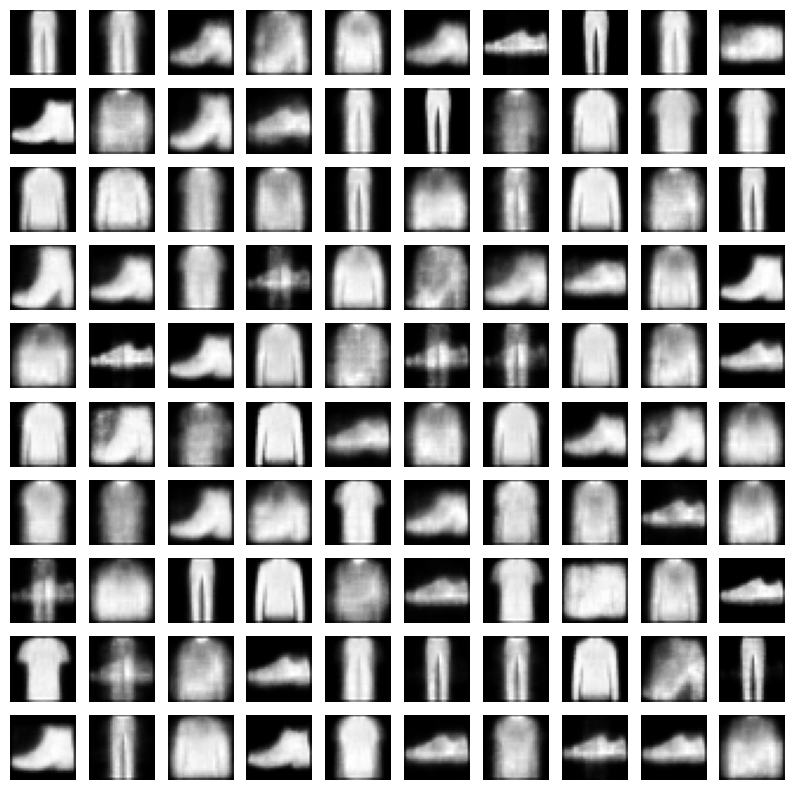

1875/1875 [==============================] - 4s 2ms/step


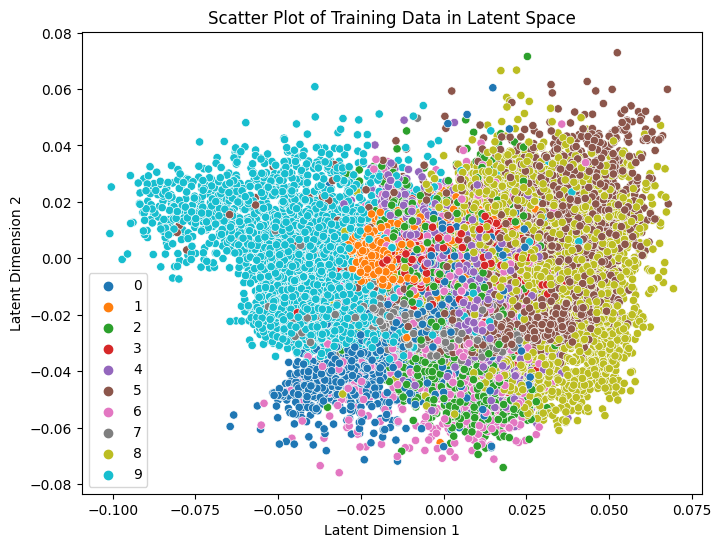

Epoch 1/15
1688/1688 [==============================] - 17s 8ms/step - loss: 0.4404 - val_loss: 0.4144
Epoch 2/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4055 - val_loss: 0.4039
Epoch 3/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.4000 - val_loss: 0.4023
Epoch 4/15
1688/1688 [==============================] - 13s 7ms/step - loss: 0.3975 - val_loss: 0.3999
Epoch 5/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3959 - val_loss: 0.3982
Epoch 6/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3948 - val_loss: 0.3973
Epoch 7/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3940 - val_loss: 0.3963
Epoch 8/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3936 - val_loss: 0.3963
Epoch 9/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3930 - val_loss: 0.3959
Epoch 10/15
1688/1688 [==============================] - 13s 8ms/step - l

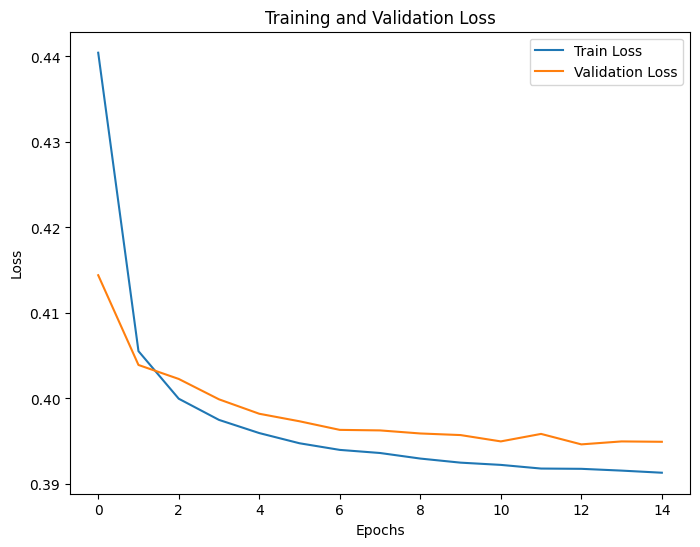

313/313 [==============================] - 1s 2ms/step
Latent Dimension: 64
              precision    recall  f1-score   support

           0       0.76      0.86      0.81      1000
           1       0.98      0.92      0.95      1000
           2       0.66      0.70      0.68      1000
           3       0.76      0.87      0.81      1000
           4       0.68      0.65      0.67      1000
           5       0.83      0.88      0.85      1000
           6       0.62      0.47      0.53      1000
           7       0.86      0.82      0.84      1000
           8       0.93      0.95      0.94      1000
           9       0.90      0.90      0.90      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



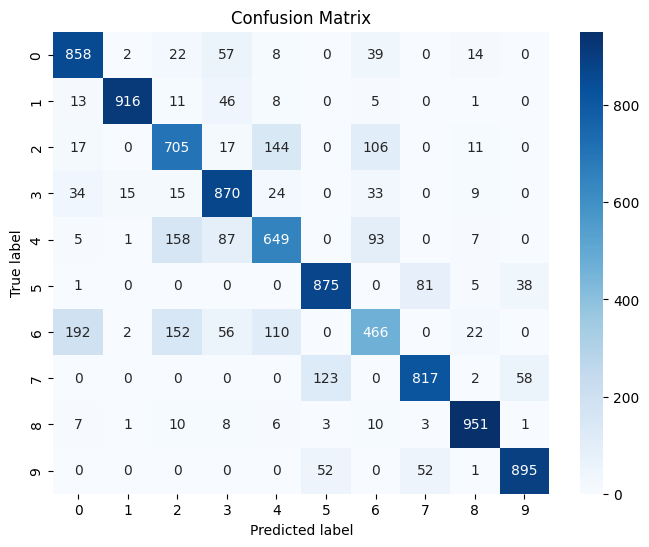

4/4 [==============================] - 0s 3ms/step


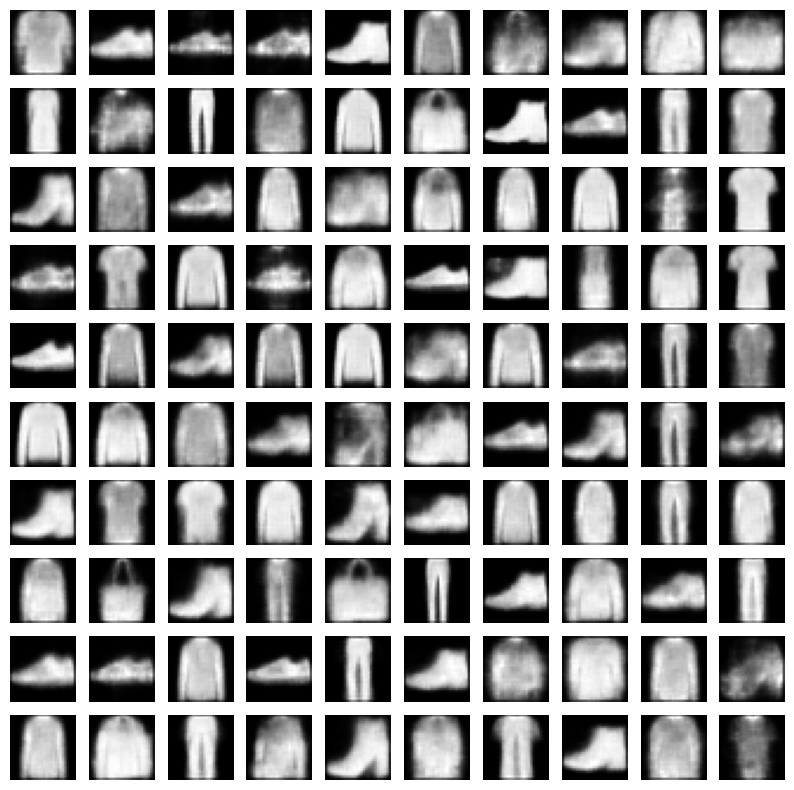

1875/1875 [==============================] - 4s 2ms/step


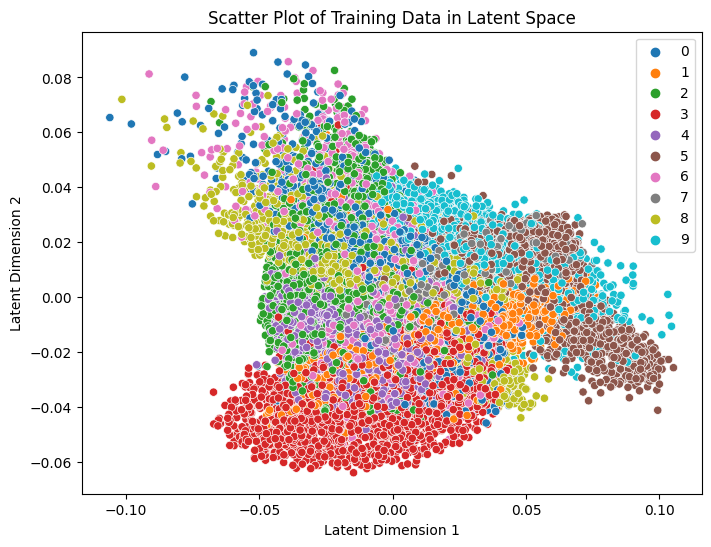

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Load the fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the data
scaler = MinMaxScaler()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1) / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1) / 255.0

# Define the CVAE class
class CVAE:
    def __init__(self, input_shape, batch_size, latent_dim):
        self.input_shape = input_shape
        self.batch_size = batch_size
        self.latent_dim = latent_dim

        # Encoder
        inputs = keras.Input(shape=self.input_shape)
        x = layers.Conv2D(filters=32, kernel_size=3, strides=2, activation='relu', padding='same')(inputs)
        x = layers.Conv2D(filters=64, kernel_size=3, strides=2, activation='relu', padding='same')(x)
        x = layers.Flatten()(x)
        x = layers.Dense(256, activation='relu')(x)
        z_mean = layers.Dense(self.latent_dim, name="z_mean")(x)
        z_log_var = layers.Dense(self.latent_dim, name="z_log_var")(x)

        # Sampling layer
        def sampling(args):
            z_mean, z_log_var = args
            epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], self.latent_dim))
            return z_mean + tf.exp(0.5 * z_log_var) * epsilon

        z = layers.Lambda(sampling, name="z")([z_mean, z_log_var])

        # Decoder
        decoder_inputs = layers.Input(shape=(self.latent_dim,))
        x = layers.Dense(7 * 7 * 64, activation='relu')(decoder_inputs)
        x = layers.Reshape((7, 7, 64))(x)
        x = layers.Conv2DTranspose(filters=64, kernel_size=3, strides=2, activation='relu', padding='same')(x)
        x = layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, activation='relu', padding='same')(x)
        outputs = layers.Conv2DTranspose(filters=1, kernel_size=3, activation='sigmoid', padding='same')(x)

        # Models
        self.encoder = keras.Model(inputs, z_mean)
        self.decoder = keras.Model(decoder_inputs, outputs)
        self.vae = keras.Model(inputs, self.decoder(self.encoder(inputs)))

        # Loss function
        reconstruction_loss = tf.reduce_mean(
            keras.losses.binary_crossentropy(inputs, self.decoder(z)), axis=[1, 2]
        )
        kl_loss = -0.5 * tf.reduce_mean(1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), axis=-1)
        vae_loss = tf.reduce_mean(reconstruction_loss + kl_loss)
        self.vae.add_loss(vae_loss)
        self.vae.compile(optimizer='adam')

    def fit(self, x_train, epochs):
        history = self.vae.fit(x_train, x_train, epochs=epochs, batch_size=self.batch_size, validation_split=0.1)
        self.plot_loss(history)

    def transform(self, x):
        return self.encoder.predict(x)

    def plot_loss(self, history):
        plt.figure(figsize=(8, 6))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()
        plt.savefig(f'loss_plot_{self.latent_dim}.pdf')
        plt.show()

    def plot_scatter(self, x_train, labels):
        latent_space = self.transform(x_train)
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=latent_space[:, 0], y=latent_space[:, 1], hue=labels, palette='tab10')
        plt.xlabel('Latent Dimension 1')
        plt.ylabel('Latent Dimension 2')
        plt.title('Scatter Plot of Training Data in Latent Space')
        plt.savefig(f'scatter_plot_{self.latent_dim}.pdf')
        plt.show()

# Task 1: Train CVAE and classify reduced dimension space with KNN
latent_dims = [32, 64]

for latent_dim in latent_dims:
    # Create CVAE instance
    cvae = CVAE(input_shape=(28, 28, 1), batch_size=32, latent_dim=latent_dim)

    # Train CVAE
    cvae.fit(train_images, epochs=15)

    # Reduce dimensionality of test data
    reduced_test_images = cvae.transform(test_images)

    # Classify reduced dimension space with KNN
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(reduced_test_images, test_labels)
    knn_pred = knn.predict(reduced_test_images)

    # Print classification report
    print(f"Latent Dimension: {latent_dim}")
    print(classification_report(test_labels, knn_pred))

    # Plot confusion matrix
    cm = confusion_matrix(test_labels, knn_pred)
    df_cm = pd.DataFrame(cm, index=np.arange(10), columns=np.arange(10))
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion Matrix")
    plt.savefig(f"confusion_matrix_{latent_dim}.pdf")
    plt.show()

    # Save CVAE encoder and decoder networks
    cvae.encoder.save(f"encoder_{latent_dim}.h5")
    cvae.decoder.save(f"decoder_{latent_dim}.h5")

    # Generate images using the decoder
    n = 10
    latent_samples = np.random.normal(size=(n * n, latent_dim))
    generated_images = cvae.decoder.predict(latent_samples)
    generated_images = generated_images.reshape(-1, 28, 28)
    plt.figure(figsize=(10, 10))
    for i in range(n):
        for j in range(n):
            plt.subplot(n, n, i * n + j + 1)
            plt.imshow(generated_images[i * n + j], cmap="gray")
            plt.axis("off")
    plt.savefig(f"generated_images_{latent_dim}.pdf")
    plt.show()

    # Plot scatter plot of training data in latent space
    cvae.plot_scatter(train_images, train_labels)
